In [228]:
import pandas as pd
import numpy as np

from plotnine import *

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [229]:
#!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

# Full Model predicting `bill_depth_mm` with all variables

In [230]:
#creating the target and the predictor variables
X = penguins.drop('bill_depth_mm', axis = 1)
y = penguins['bill_depth_mm']

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [232]:
# Showing how to one-hot-encode  multiple columns in one go
## Preprocessing: One-Hot-Encode
## Model Spec: Linear Regression

#renaming the model specification
lr = LinearRegression()

#renaming the preprocessor
enc = OneHotEncoder()

#renaming the transformer
ct = ColumnTransformer(
    [("dummify_specied", enc, ["species"]),
    ("dummify_island", enc, ["island"]),
    ("dummify_sex", enc, ["sex"])],
)
#>>> pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())]) #just example code for pipe syntax

#naming teh pipeline
my_pipeline = Pipeline(
    [('dummify_everything', ct), ('ols', lr)]
)

In [233]:
#fitting the model on the entire dataset, test
model_full = my_pipeline.fit(X_train, y_train)
model_full

Pipeline(steps=[('dummify_everything',
                 ColumnTransformer(transformers=[('dummify_specied',
                                                  OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_island',
                                                  OneHotEncoder(), ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('ols', LinearRegression())])

In [234]:
#predictions for the test data
model_full_test_pred = model_full.predict(X_test)
#predictions for the training data
model_full_train_pred = model_full.predict(X_train)

In [235]:
# getting the mse_test
model_full_mse_test = mean_squared_error(y_test, model_full_test_pred)
print(f"Mean Squared Error (MSE) Test Data: {model_full_mse_test}")

# getting the mse_train
model_full_mse_train = mean_squared_error(y_train, model_full_train_pred)
print(f"Mean Squared Error (MSE) Training Data: {model_full_mse_train}")

Mean Squared Error (MSE) Test Data: 0.7538739413306826
Mean Squared Error (MSE) Training Data: 0.6653534131643761


In [236]:
# number of features for model 1
features_model_full = X.shape[1] + 1
print(f"Number of features: {features_model_full}")

Number of features: 8


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

# Model 1

In [237]:
#MODEL 1

#creating the target and the predictor variables
X_model_1 = penguins.drop(['bill_depth_mm','year'], axis=1)
y_model_1 = penguins['bill_depth_mm']

#creating the test sets and training sets for model 1
X_train, X_test, y_train, y_test = train_test_split(X_model_1, y_model_1, test_size=0.25)

#renaming the model specification
lr = LinearRegression()

#renaming the preprocessor
enc = OneHotEncoder()

#renaming the transformer
ct = ColumnTransformer([("dummify_specied", enc, ["species"]),("dummify_island", enc, ["island"]),("dummify_sex", enc, ["sex"])],)

#naming teh pipeline
model_1_pipeline = Pipeline([('dummify_everything', ct), ('ols', lr)])

#fitting the model on the entire dataset, test
model_1 = model_1_pipeline.fit(X_train, y_train)  #NOTE the same pipeline was used
model_1

#predictions for the test data
model_1_test_pred = model_1.predict(X_test)
#predictions for the training data
model_1_train_pred = model_1.predict(X_train)

# getting the mse_test
model_1_mse_test = mean_squared_error(y_test, model_1_test_pred)
print(f"Mean Squared Error (MSE) Test Data: {model_1_mse_test}")

# getting the mse_train
model_1_mse_train = mean_squared_error(y_train, model_1_train_pred)
print(f"Mean Squared Error (MSE) Training Data: {model_1_mse_train}")

# number of features for model 1
features_model_1 = X_model_1.shape[1] + 1
print(f"Number of columns: {features_model_1}")

Mean Squared Error (MSE) Test Data: 0.7171692475818449
Mean Squared Error (MSE) Training Data: 0.6752696724397592
Number of columns: 7


# Model 2

In [238]:
#MODEL 2

#creating the target and the predictor variables
X_model_2 = penguins.drop(['bill_depth_mm', 'year', 'island'], axis=1)
y_model_2 = penguins['bill_depth_mm']

#creating the test sets and training sets for model 1
X_train, X_test, y_train, y_test = train_test_split(X_model_2, y_model_2, test_size=0.25)

#renaming the model specification
lr = LinearRegression()

#renaming the preprocessor
enc = OneHotEncoder()


#renaming the transformer
ct = ColumnTransformer([("dummify_specied", enc, ["species"]),("dummify_sex", enc, ["sex"])],)

#naming teh pipeline
model_2_pipeline = Pipeline([('dummify_everything', ct), ('ols', lr)])

#fitting the model on the entire dataset, test
model_2 = model_2_pipeline.fit(X_train, y_train)  #NOTE the same pipeline was used
model_2

#predictions for the test data
model_2_test_pred = model_2.predict(X_test)
#predictions for the training data
model_2_train_pred = model_2.predict(X_train)

# getting the mse_test
model_2_mse_test = mean_squared_error(y_test, model_2_test_pred)
print(f"Mean Squared Error (MSE) Test Data: {model_2_mse_test}")

# getting the mse_train
model_2_mse_train = mean_squared_error(y_train, model_2_train_pred)
print(f"Mean Squared Error (MSE) Training Data: {model1_mse_train}")

# number of features for model 1
features_model_2 = X_model_2.shape[1] + 1
print(f"Number of features: {features_model_2}")

Mean Squared Error (MSE) Test Data: 0.8837202380952383
Mean Squared Error (MSE) Training Data: 0.6969241026606425
Number of features: 6


# Model 3

In [239]:
#MODEL 3

#creating the target and the predictor variables
X_model_3 = penguins.drop(['bill_depth_mm', 'species', 'island', 'sex', 'year'], axis=1)
y_model_3 = penguins['bill_depth_mm']

#creating the test sets and training sets for model 1
X_train, X_test, y_train, y_test = train_test_split(X_model_3, y_model_3, test_size=0.25)

#renaming the model specification
lr = LinearRegression()

#naming the pipeline
model_3_pipeline = Pipeline([('ols', lr)])

#fitting the model on the entire dataset, test
model_3 = model_3_pipeline.fit(X_train, y_train)  #NOTE the same pipeline was used
model_3

#predictions for the test data
model_3_test_pred = model_3.predict(X_test)
#predictions for the training data
model_3_train_pred = model_3.predict(X_train)

# getting the mse_test
model_3_mse_test = mean_squared_error(y_test, model_3_test_pred)
print(f"Mean Squared Error (MSE) Test Data: {model_3_mse_test}")

# getting the mse_train
model_3_mse_train = mean_squared_error(y_train, model_3_train_pred)
print(f"Mean Squared Error (MSE) Training Data: {model1_mse_train}")

# number of features for model 3
features_model_3 = X_model_3.shape[1] + 1
print(f"Number of features: {features_model_3}")

Mean Squared Error (MSE) Test Data: 2.225796132131935
Mean Squared Error (MSE) Training Data: 0.6969241026606425
Number of features: 4


# Model 4

In [240]:
#MODEL 4

#creating the target and the predictor variables
X_model_4 = penguins.drop(['bill_depth_mm','year', 'island', 'bill_length_mm'], axis=1)
y_model_4 = penguins['bill_depth_mm']

#creating the test sets and training sets for model 1
X_train, X_test, y_train, y_test = train_test_split(X_model_4, y_model_4, test_size=0.25)

#renaming the model specification
lr = LinearRegression()

#renaming the preprocessor
enc = OneHotEncoder()

#renaming the transformer
ct = ColumnTransformer([("dummify_specied", enc, ["species"]),("dummify_sex", enc, ["sex"])],)

#naming teh pipeline
model_4_pipeline = Pipeline([('dummify_everything', ct), ('ols', lr)])

#fitting the model on the entire dataset, test
model_4 = model_4_pipeline.fit(X_train, y_train)  #NOTE the same pipeline was used
model_4

#predictions for the test data
model_4_test_pred = model_4.predict(X_test)
#predictions for the training data
model_4_train_pred = model_4.predict(X_train)

# getting the mse_test
model_4_mse_test = mean_squared_error(y_test, model_4_test_pred)
print(f"Mean Squared Error (MSE) Test Data: {model_4_mse_test}")

# getting the mse_train
model_4_mse_train = mean_squared_error(y_train, model_4_train_pred)
print(f"Mean Squared Error (MSE) Training Data: {model_4_mse_train}")

# number of features for model 4
features_model_4 = X_model_4.shape[1] + 1
print(f"Number of columns: {features_model_4}")

Mean Squared Error (MSE) Test Data: 0.9581938244047615
Mean Squared Error (MSE) Training Data: 0.6373236696787149
Number of columns: 5


#Plot for comparisons

In [241]:
data = {
    "features": [features_model_full, features_model_1, features_model_2, features_model_3, features_model_4],
    "mse_test": [model_full_mse_test, model_1_mse_test, model_2_mse_test, model_3_mse_test, model_4_mse_test],
    "mse_train": [model_full_mse_train, model_1_mse_train, model_2_mse_train, model_3_mse_train, model_4_mse_train],
    "model": ["model_full", "model_1", "model_2", "model_3", "model_4"]
}

metric_df = pd.DataFrame(data)
metric_df

,features,mse_test,mse_train,model
0,8,0.753874,0.665353,model_full
1,7,0.717169,0.675270,model_1
2,6,0.883720,0.658149,model_2
3,4,2.225796,2.482593,model_3
4,5,0.958194,0.637324,model_4


In [242]:
# Create a combined DataFrame with features, mse_train, mse_test, and model
combined_df = metric_df.melt(id_vars=['features', 'model'], var_name='mse_type', value_name='mse_value')
combined_df

,features,model,mse_type,mse_value
0,8,model_full,mse_test,0.753874
1,7,model_1,mse_test,0.717169
2,6,model_2,mse_test,0.883720
3,4,model_3,mse_test,2.225796
4,5,model_4,mse_test,0.958194
5,8,model_full,mse_train,0.665353
6,7,model_1,mse_train,0.675270
7,6,model_2,mse_train,0.658149
8,4,model_3,mse_train,2.482593
9,5,model_4,mse_train,0.637324


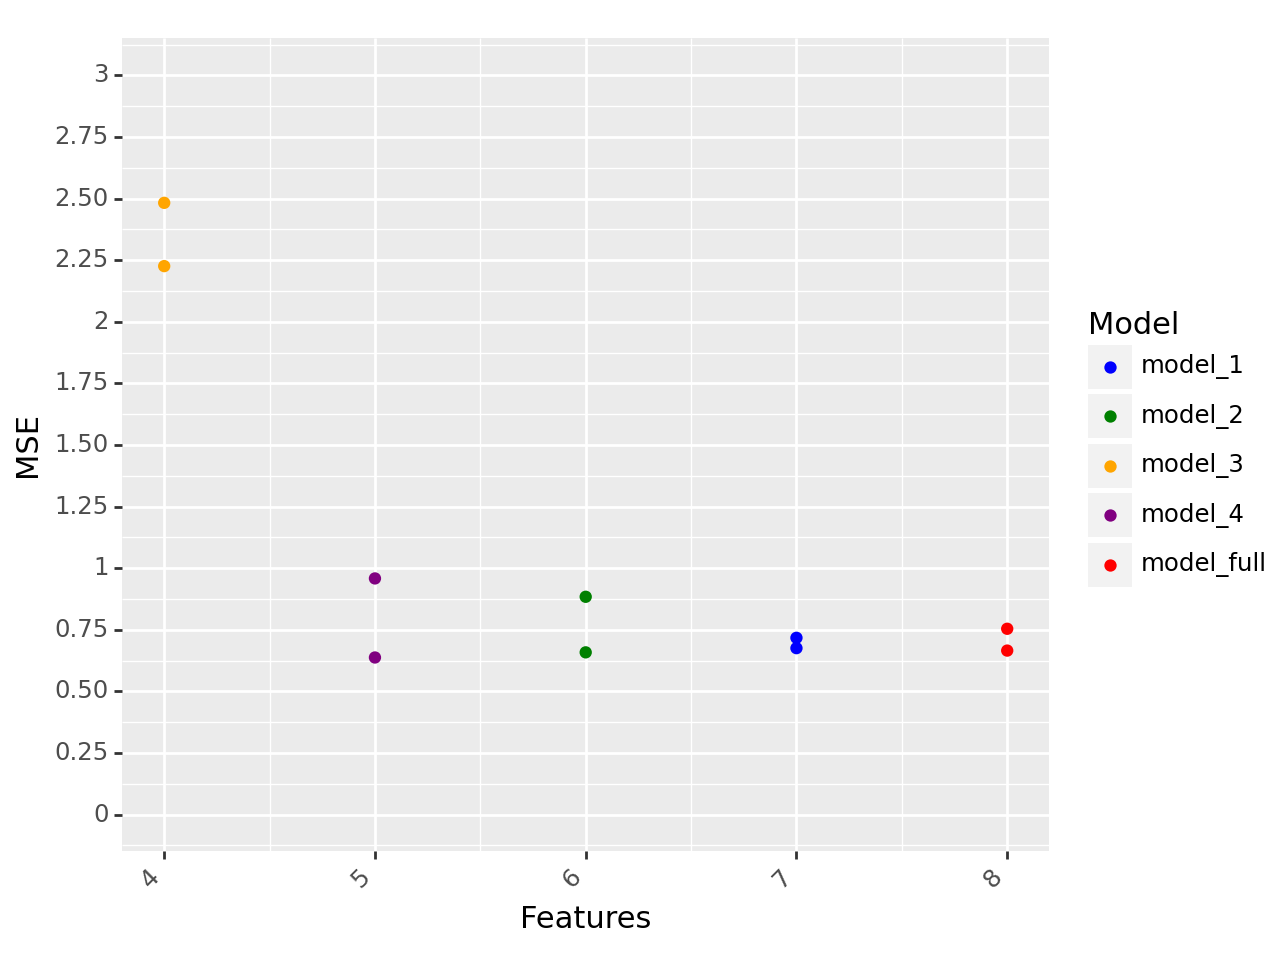

In [244]:
# Create the scatter plot
scatter_plot = (ggplot(combined_df, aes(x='features', y='mse_value', color='model'))
+ geom_point()
+ labs(x='Features', y='MSE')
+ theme(axis_text_x=element_text(angle=45, hjust=1))
+ scale_y_continuous(limits=(0, 3), breaks=[0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
+ scale_color_manual(values={'model_full': 'red', 'model_1': 'blue', 'model_2': 'green', 'model_3': 'orange', 'model_4': 'purple'})
+ guides(color=guide_legend(title="Model"))
)

print(scatter_plot)

# Conclusion

From the plot it is clear that model 1 was the best as it had the least difference in the training and the test error as well as the least error overall comparatively, at least in terms of comparing them based on Mean Squared Error. Other metrics should be used for comparing models.